In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!unzip '/content/drive/MyDrive/PokemonClassificationProject/pokemon-dataset.zip' -d '/content/dataset/'

Archive:  /content/drive/MyDrive/PokemonClassificationProject/pokemon-dataset.zip
   creating: /content/dataset/Bulbasaur/
 extracting: /content/dataset/Bulbasaur/0001.jpg  
 extracting: /content/dataset/Bulbasaur/0002.jpg  
 extracting: /content/dataset/Bulbasaur/0003.jpg  
 extracting: /content/dataset/Bulbasaur/0004.jpg  
 extracting: /content/dataset/Bulbasaur/0005.jpg  
 extracting: /content/dataset/Bulbasaur/0006.jpg  
 extracting: /content/dataset/Bulbasaur/0007.jpg  
 extracting: /content/dataset/Bulbasaur/0008.jpg  
 extracting: /content/dataset/Bulbasaur/0009.jpg  
 extracting: /content/dataset/Bulbasaur/0010.jpg  
 extracting: /content/dataset/Bulbasaur/0011.jpg  
 extracting: /content/dataset/Bulbasaur/0012.jpg  
 extracting: /content/dataset/Bulbasaur/0013.jpg  
 extracting: /content/dataset/Bulbasaur/0014.jpg  
 extracting: /content/dataset/Bulbasaur/0015.jpg  
 extracting: /content/dataset/Bulbasaur/0016.jpg  
 extracting: /content/dataset/Bulbasaur/0017.jpg  
 extractin

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [4]:
#Checking number of images
path = Path('/content/dataset/')

freq = []
for dirs in path.glob("*"):
  cnt = 0
  for imgs in dirs.glob("*.jpg"):
    cnt = cnt + 1
  freq.append((cnt, dirs))

In [5]:
freq = np.array(freq)
print(freq)

[[280 PosixPath('/content/dataset/Pikachu')]
 [280 PosixPath('/content/dataset/Bulbasaur')]
 [280 PosixPath('/content/dataset/Squirtle')]
 [280 PosixPath('/content/dataset/Mewtwo')]
 [280 PosixPath('/content/dataset/Charmander')]]


In [6]:
#Sorting in descending order to select the larger datasets in case dataset is skewed
srtfreq = sorted(freq, key = lambda x : x[0], reverse = True)
print(srtfreq)

[array([280, PosixPath('/content/dataset/Pikachu')], dtype=object), array([280, PosixPath('/content/dataset/Bulbasaur')], dtype=object), array([280, PosixPath('/content/dataset/Squirtle')], dtype=object), array([280, PosixPath('/content/dataset/Mewtwo')], dtype=object), array([280, PosixPath('/content/dataset/Charmander')], dtype=object)]


In [7]:
srtfreq = np.array(srtfreq)
print(srtfreq.shape)

(5, 2)


In [9]:
#Image loading may fail so try/pass is used

X_train = []
Y_train = []
X_test = []
Y_test = []

split = input('Enter training split - ')

for ix in range(int(srtfreq.shape[0])):
  label = str(srtfreq[ix][1]).split('/')[3]
  print(label)
  images = []
  labels = []
  for imgs in srtfreq[ix][1].glob("*.jpg"):
    try:
      img_data = image.load_img(imgs, target_size=(128, 128))
      img_array = image.img_to_array(img_data)
      images.append(img_array)
      labels.append(label)
    except:
      pass
  
  lsplit = int(float(split) * len(images))
  print("Split - " + str(lsplit))
  X_train.extend(images[:lsplit])
  Y_train.extend(labels[:lsplit])
  X_test.extend(images[lsplit:])
  Y_test.extend(labels[lsplit:])

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

Enter training split - 0.7
Pikachu
Split - 196
Bulbasaur
Split - 196
Squirtle
Split - 196
Mewtwo
Split - 196
Charmander
Split - 196


In [10]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(980, 128, 128, 3) (980,)
(420, 128, 128, 3) (420,)


In [11]:
from random import shuffle
def shuffleXY(X_data, Y_data):
  #convert to list
  X_data = list(X_data)
  Y_data = list(Y_data)
  #zip together, shuffle and unzip
  data = list(zip(X_data, Y_data))
  shuffle(data)
  X_data, Y_data = zip(*data)
  #back to array
  X_data = np.array(X_data)
  Y_data = np.array(Y_data)
  return X_data, Y_data

In [12]:
X_train, Y_train = shuffleXY(X_train, Y_train)
X_test, Y_test = shuffleXY(X_test, Y_test)

In [13]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(980, 128, 128, 3) (980,)
(420, 128, 128, 3) (420,)


In [14]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
Y_train = Le.fit_transform(Y_train)
Y_test = Le.fit_transform(Y_test)

In [15]:
print(Y_train.shape, Y_test.shape)

(980,) (420,)


In [16]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNNClf = KNeighborsClassifier(n_neighbors = 10)
X_trainflat = X_train.reshape((-1, 49152))
X_testflat = X_test.reshape((-1, 49152))
KNNClf.fit(X_trainflat, Y_train)
KNNClf.score(X_testflat, Y_test)

0.6714285714285714

In [17]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lrclf = LogisticRegression().fit(X_trainflat, Y_train)
lrclf.score(X_testflat, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.830952380952381

In [18]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnbclf = GaussianNB().fit(X_trainflat, Y_train)
gnbclf.score(X_testflat, Y_test)

0.49047619047619045

In [19]:
#Support Vector Machines
from sklearn.svm import SVC
svmclf = SVC().fit(X_trainflat, Y_train)
svmclf.score(X_testflat, Y_test)

0.85

In [20]:
#Convolution Neural Networks
import pandas as pd
from tensorflow.keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [21]:
Y_traincat = to_categorical(Y_train)
Y_testcat = to_categorical(Y_test)

In [22]:
#Normalization
X_train = X_train / 255
X_test = X_test / 255

In [23]:
model = Sequential()
model.add(Convolution2D(64, (3,3), activation='relu', input_shape = (128, 128, 3)))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(Convolution2D(32, (5,5), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D())
model.add(Convolution2D(16, (5,5), activation='relu'))
model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        102432    
_________________________________________________________________
dropout_1 (Dropout)          (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [25]:
#350 Epochs
hist = model.fit(X_train, Y_traincat, batch_size = 64, epochs = 350, validation_data=(X_test, Y_testcat))

Epoch 1/350
16/16 [==============================] - 20s 174ms/step - loss: 1.4055 - accuracy: 0.3907 - val_loss: 0.8307 - val_accuracy: 0.7214
Epoch 2/350
16/16 [==============================] - 2s 100ms/step - loss: 0.6012 - accuracy: 0.8013 - val_loss: 0.6356 - val_accuracy: 0.8143
Epoch 3/350
16/16 [==============================] - 2s 100ms/step - loss: 0.5514 - accuracy: 0.8312 - val_loss: 0.5325 - val_accuracy: 0.8167
Epoch 4/350
16/16 [==============================] - 2s 100ms/step - loss: 0.4706 - accuracy: 0.8473 - val_loss: 0.5230 - val_accuracy: 0.8333
Epoch 5/350
16/16 [==============================] - 2s 99ms/step - loss: 0.3384 - accuracy: 0.9002 - val_loss: 0.4686 - val_accuracy: 0.8857
Epoch 6/350
16/16 [==============================] - 2s 99ms/step - loss: 0.3563 - accuracy: 0.8885 - val_loss: 0.4141 - val_accuracy: 0.8762
Epoch 7/350
16/16 [==============================] - 2s 99ms/step - loss: 0.3541 - accuracy: 0.8852 - val_loss: 0.4140 - val_accuracy: 0.8690
E

Actual Label is - Charmander
Predicted Label is - Charmander
Actual Label is - Mewtwo
Predicted Label is - Mewtwo
Actual Label is - Squirtle
Predicted Label is - Squirtle
Actual Label is - Charmander
Predicted Label is - Charmander
Actual Label is - Squirtle
Predicted Label is - Squirtle
Actual Label is - Squirtle
Predicted Label is - Squirtle
Actual Label is - Squirtle
Predicted Label is - Squirtle
Actual Label is - Pikachu
Predicted Label is - Pikachu
Actual Label is - Squirtle
Predicted Label is - Squirtle
Actual Label is - Mewtwo
Predicted Label is - Mewtwo


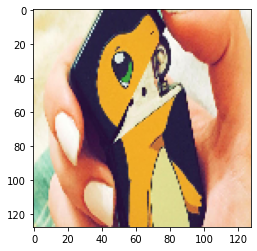

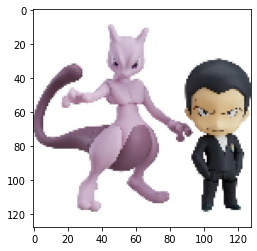

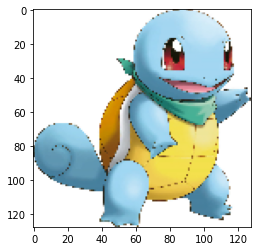

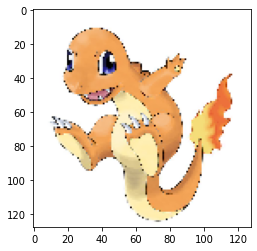

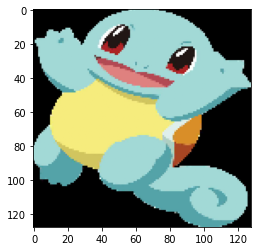

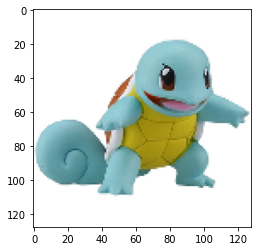

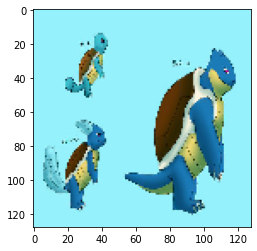

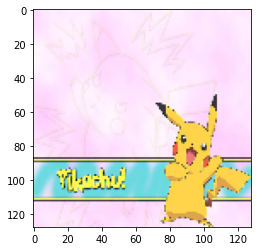

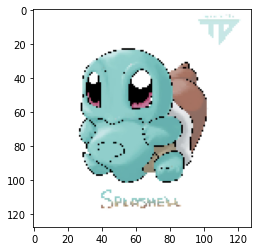

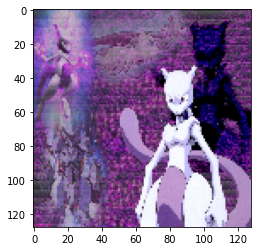

In [35]:
#Showcase | From training data
training_images = X_train[:10]
training_labels = Y_train[:10]

for ix in range(10):
  sample_image = np.expand_dims(training_images[ix], axis = 0)
  sample_label = Y_train[ix]
  mypredict = model.predict(sample_image)
  plt.figure(str(ix))
  plt.imshow(training_images[ix])
  labelist = [sample_label]
  print("Actual Label is - " + str(Le.inverse_transform(labelist)[0]))
  labelist = [np.argmax(mypredict)]
  print("Predicted Label is - " + str(Le.inverse_transform(labelist)[0]))


Actual Label is - Pikachu
Predicted Label is - Pikachu
Actual Label is - Bulbasaur
Predicted Label is - Bulbasaur
Actual Label is - Charmander
Predicted Label is - Charmander
Actual Label is - Charmander
Predicted Label is - Charmander
Actual Label is - Bulbasaur
Predicted Label is - Bulbasaur
Actual Label is - Bulbasaur
Predicted Label is - Mewtwo
Actual Label is - Squirtle
Predicted Label is - Mewtwo
Actual Label is - Bulbasaur
Predicted Label is - Bulbasaur
Actual Label is - Pikachu
Predicted Label is - Pikachu
Actual Label is - Squirtle
Predicted Label is - Squirtle


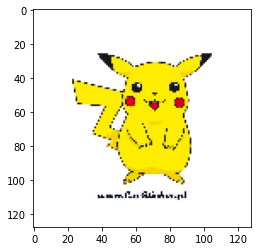

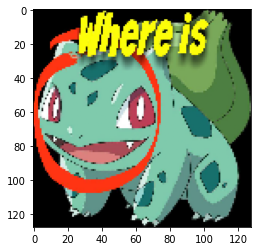

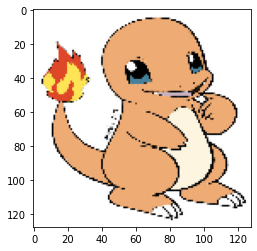

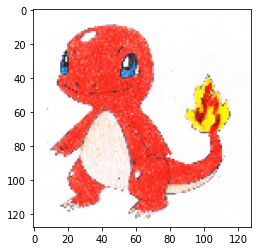

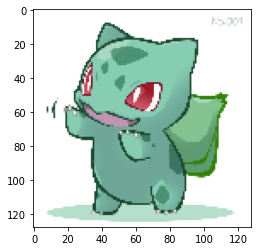

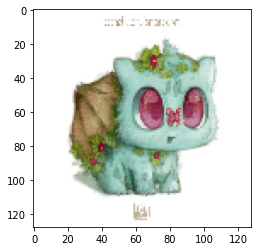

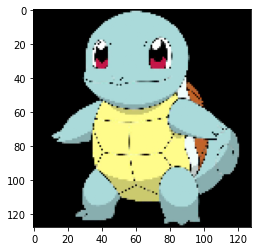

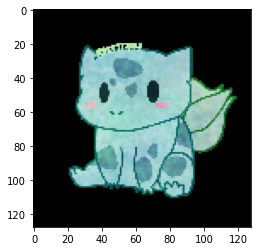

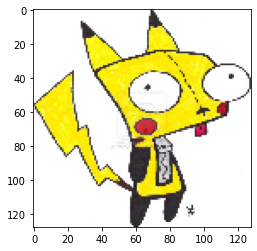

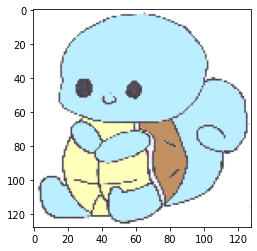

In [36]:
#Showcase | From testing data
testing_images = X_test[:10]
testing_labels = Y_test[:10]

for ix in range(10):
  sample_image = np.expand_dims(testing_images[ix], axis = 0)
  sample_label = Y_test[ix]
  mypredict = model.predict(sample_image)
  plt.figure(str(ix))
  plt.imshow(testing_images[ix])
  labelist = [sample_label]
  print("Actual Label is - " + str(Le.inverse_transform(labelist)[0]))
  labelist = [np.argmax(mypredict)]
  print("Predicted Label is - " + str(Le.inverse_transform(labelist)[0]))

In [37]:
#saving weights
model.save_weights("model.h5")